In [1]:
import numpy as np
from oscar import InterpolatedLandscapeExecutor, ScikitQuantOptimizer, plot_2d_landscape

p = 1
n = 14
seed = 0
resolutions = [64, 64]
bounds = [(-1.4, -0.8), (0.9, 1.3)]

filename = f"data/landscapes/{p=}/{n=}/{p=}-{n=}-{seed=}-{bounds}-{resolutions}"
landscape = np.load(filename + ".pckl", allow_pickle=True)
print("Grid minima: ", landscape.optimal_params.flatten(), landscape.optimal_value)

Grid minima:  [-1.1375   1.04375] 0.07403812812560229


Total time: 0.008501291275024414
Optimal parameters reported:  [-1.13357764  1.04785258]
Optimal value reported:  0.07403874125737465
Number of evaluations:  20


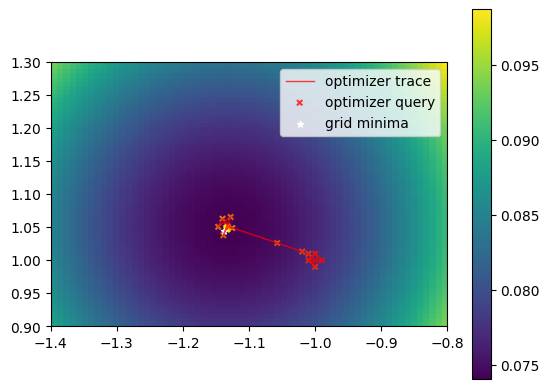

In [11]:
optimizer = "bobyqa"
budget = 20
initial_point=[-1, 1]

executor = InterpolatedLandscapeExecutor(landscape)
trace, original_result = ScikitQuantOptimizer(method=optimizer, budget=budget).run(
    executor, initial_point=initial_point, bounds=bounds, rhobeg=0.01
)
trace.print_result()
figure = plot_2d_landscape(landscape, trace)

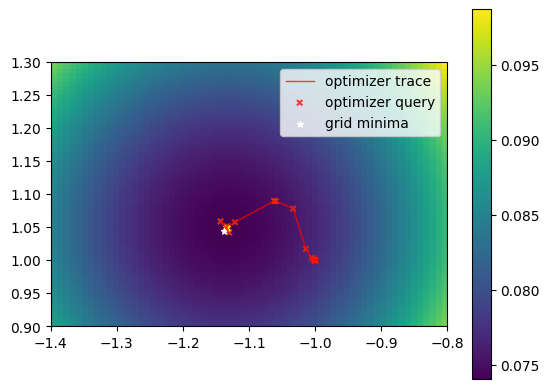

Total time: 0.03165435791015625
Optimal parameters reported:  [-1.13333006  1.04837225]
Optimal value reported:  0.07403840287707197
Number of evaluations:  50


In [16]:
optimizer = "bobyqa"
budget = 50
initial_point = [-1, 1]

executor = InterpolatedLandscapeExecutor(landscape)
trace, _ = ScikitQuantOptimizer(optimizer, budget).run(executor, initial_point, bounds, rhobeg=0.001)
plot_2d_landscape(landscape, trace)
trace.print_result()